<a href="https://colab.research.google.com/github/start-dash/Intro-to-ML/blob/main/HW5%2C_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 2a. Develop preprocessing and a training loop to train a linear regression model that predicts housing price based on the following input variables:
# area, bedrooms, bathrooms, stories, parking
# For this, you need to use the housing dataset. For training and validation, use 80% (training) and 20% (validation) split. Identify the best parameters for your
# regression model based on the above input variables. in this case you will have 6 parameters.
# 2b. Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need 4 separate trainings).
# Report your loss and validation accuracy for every 500 epochs per training. Pick the best linear model.
# 2c. Compare your results against the linear regression done in HW 1. Do you see meaningful differences?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Create a classifier
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
#Creating an SVM classifier
from sklearn import svm
# "Linear Support vector classifier"
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA

#As an example of support vector machines in action, let's take a look at the facial recognition problem.
from sklearn.datasets import fetch_lfw_people
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mode
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

from ipywidgets import interact, fixed
#let's look at some data that is not linearly separable:
from sklearn.datasets import make_circles
from mpl_toolkits import mplot3d
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#Finally, we can use a grid search cross-validation to explore combinations of parameters.
#Here we will adjust C (which controls the margin hardness)
#We also explore gamma (which controls the size of the radial basis function kernel)
#and determine the best model:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# For better accuracy
from sklearn.datasets import load_breast_cancer
# Evaluate the model using evaluation metrics: Accuracy, precision, and recall.
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
import torch
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch.optim as optim
import pandas as pd
import numpy as np
import torch

Read URL

In [ ]:
url = "https://raw.githubusercontent.com/start-dash/Intro-to-ML/main/Datasets/Housing.csv"
housing = pd.read_csv(url)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Variables Mapping

In [ ]:
# List of variables to map

varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

y = housing.pop('price')
x = housing[varlist].values

t_u = torch.tensor(x, dtype=torch.float32)
t_un = torch.tensor(StandardScaler().fit_transform(x), dtype=torch.float32)
t_c = torch.tensor(y, dtype=torch.float32)

In [ ]:
n_samples = t_un.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_u = t_u[train_indices]
train_t_un = t_un[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_un = t_un[val_indices]
val_t_c = t_c[val_indices]

In [ ]:
def lin_model(t_u, w5, w4, w3, w2, w1, b):
  return torch.matmul(t_u, params[:-1]) + params[-1]

def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
  training_losses = []
  valid_losses = []

  for epoch in range(1, n_epochs + 1):
    train_t_p = lin_model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)

    val_t_p = lin_model(val_t_u, *params)
    val_loss = loss_fn(val_t_p, val_t_c)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    training_losses.append(train_loss)
    valid_losses.append(val_loss)

    if epoch % 500 == 0:
      print(f'Epoch {epoch}, Training Loss {train_loss.item():.4f}, Validation Loss {val_loss.item():.4f}')
  return params, train_loss, val_loss

SGD Optimized

In [ ]:
from torch.optim.sgd import SGD
learning_rate = [0.1, 0.01, 0.001, 0.0001]
for lr in learning_rate:
  params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
  optimizerSGD_linear = optim.SGD([params], lr = lr)
  print(f'Training with learning rate: {lr}')
  training_loop(
      n_epochs = 5000,
      optimizer=optimizerSGD_linear,
      params = params,
      train_t_u = train_t_un,
      val_t_u = val_t_un,
      train_t_c = train_t_c,
      val_t_c = val_t_c
  )

Training with learning rate: 0.1
Epoch 500, Training Loss nan, Validation Loss nan
Epoch 1000, Training Loss nan, Validation Loss nan
Epoch 1500, Training Loss nan, Validation Loss nan
Epoch 2000, Training Loss nan, Validation Loss nan
Epoch 2500, Training Loss nan, Validation Loss nan
Epoch 3000, Training Loss nan, Validation Loss nan
Epoch 3500, Training Loss nan, Validation Loss nan
Epoch 4000, Training Loss nan, Validation Loss nan
Epoch 4500, Training Loss nan, Validation Loss nan
Epoch 5000, Training Loss nan, Validation Loss nan
Training with learning rate: 0.01
Epoch 500, Training Loss nan, Validation Loss nan
Epoch 1000, Training Loss nan, Validation Loss nan
Epoch 1500, Training Loss nan, Validation Loss nan
Epoch 2000, Training Loss nan, Validation Loss nan
Epoch 2500, Training Loss nan, Validation Loss nan
Epoch 3000, Training Loss nan, Validation Loss nan
Epoch 3500, Training Loss nan, Validation Loss nan
Epoch 4000, Training Loss nan, Validation Loss nan
Epoch 4500, Train

In [ ]:
# store train and valid losses
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.1)

model, trainLoss, validLoss = training_loop(5000, optimizer, params, train_t_un, val_t_un, train_t_c, val_t_c)
SGD_trainLoss1 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss1 = np.array([item.detach().item() for item in validLoss])

optimizer = optim.SGD([params], lr = 0.01)

model, trainLoss, validLoss = training_loop(5000, optimizer, params, train_t_un, val_t_un, train_t_c, val_t_c)
SGD_trainLoss2 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss2 = np.array([item.detach().item() for item in validLoss])

optimizer = optim.SGD([params], lr = 0.001)

model, trainLoss, validLoss = training_loop(5000, optimizer, params, train_t_un, val_t_un, train_t_c, val_t_c)
SGD_trainLoss3 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss3 = np.array([item.detach().item() for item in validLoss])

optimizer = optim.SGD([params], lr = 0.0001)

model, trainLoss, validLoss = training_loop(5000, optimizer, params, train_t_un, val_t_un, train_t_c, val_t_c)
SGD_trainLoss4 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss4 = np.array([item.detach().item() for item in validLoss])

Epoch 500, Training Loss 1536919863296.0000, Validation Loss 1527499456512.0000
Epoch 1000, Training Loss 1536919863296.0000, Validation Loss 1527499456512.0000
Epoch 1500, Training Loss 1536919863296.0000, Validation Loss 1527499456512.0000
Epoch 2000, Training Loss 1536919863296.0000, Validation Loss 1527499456512.0000
Epoch 2500, Training Loss 1536919863296.0000, Validation Loss 1527499456512.0000
Epoch 3000, Training Loss 1536919863296.0000, Validation Loss 1527499456512.0000
Epoch 3500, Training Loss 1536919863296.0000, Validation Loss 1527499456512.0000
Epoch 4000, Training Loss 1536919863296.0000, Validation Loss 1527499456512.0000
Epoch 4500, Training Loss 1536919863296.0000, Validation Loss 1527499456512.0000
Epoch 5000, Training Loss 1536919863296.0000, Validation Loss 1527499456512.0000


TypeError: ignored

Adam Optimized

In [ ]:
learning_rate = [0.1, 0.01, 0.001, 0.0001]
for lr in learning_rate:
  params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
  optimizerADAM_linear = optim.Adam([params], lr = lr)
  print(f'Training with learning rate: {lr}')
  training_loop(
        n_epochs = 5000,
        optimizer=optimizerADAM_linear,
        params = params,
        train_t_u = train_t_un,
        val_t_u = val_t_un,
        train_t_c = train_t_c,
        val_t_c = val_t_c
    )

Training with learning rate: 0.1
Epoch 500, Training Loss 25441865826304.0000, Validation Loss 27943126433792.0000
Epoch 1000, Training Loss 25183358287872.0000, Validation Loss 27653780275200.0000
Epoch 1500, Training Loss 24926891278336.0000, Validation Loss 27366707429376.0000
Epoch 2000, Training Loss 24672355745792.0000, Validation Loss 27081777872896.0000
Epoch 2500, Training Loss 24419646832640.0000, Validation Loss 26798888845312.0000
Epoch 3000, Training Loss 24168699527168.0000, Validation Loss 26517950169088.0000
Epoch 3500, Training Loss 23919444623360.0000, Validation Loss 26238886346752.0000
Epoch 4000, Training Loss 23671821303808.0000, Validation Loss 25961636560896.0000
Epoch 4500, Training Loss 23425812791296.0000, Validation Loss 25686179840000.0000
Epoch 5000, Training Loss 23181379239936.0000, Validation Loss 25412467949568.0000
Training with learning rate: 0.01
Epoch 500, Training Loss 25675912183808.0000, Validation Loss 28205069107200.0000
Epoch 1000, Training L

In [ ]:
# store train and valid losses
optimizer = optim.Adam([params], lr = 0.1)

model, trainLoss, validLoss = training_loop(5000, optimizer, params, train_t_un, val_t_un, train_t_c, val_t_c)
ADAM_trainLoss1 = np.array([item.detach().item() for item in trainLoss])
ADAM_validLoss1 = np.array([item.detach().item() for item in validLoss])

optimizer = optim.Adam([params], lr = 0.01)

model, trainLoss, validLoss = training_loop(5000, optimizer, params, train_t_un, val_t_un, train_t_c, val_t_c)
ADAM_trainLoss2 = np.array([item.detach().item() for item in trainLoss])
ADAM_validLoss2 = np.array([item.detach().item() for item in validLoss])

optimizer = optim.Adam([params], lr = 0.001)

model, trainLoss, validLoss = training_loop(5000, optimizer, params, train_t_un, val_t_un, train_t_c, val_t_c)
ADAM_trainLoss3 = np.array([item.detach().item() for item in trainLoss])
ADAM_validLoss3 = np.array([item.detach().item() for item in validLoss])

optimizer = optim.Adam([params], lr = 0.0001)

model, trainLoss, validLoss = training_loop(5000, optimizer, params, train_t_un, val_t_un, train_t_c, val_t_c)
ADAM_trainLoss4 = np.array([item.detach().item() for item in trainLoss])
ADAM_validLoss4 = np.array([item.detach().item() for item in validLoss])

Linear Regression Loss Plots

NameError: ignored

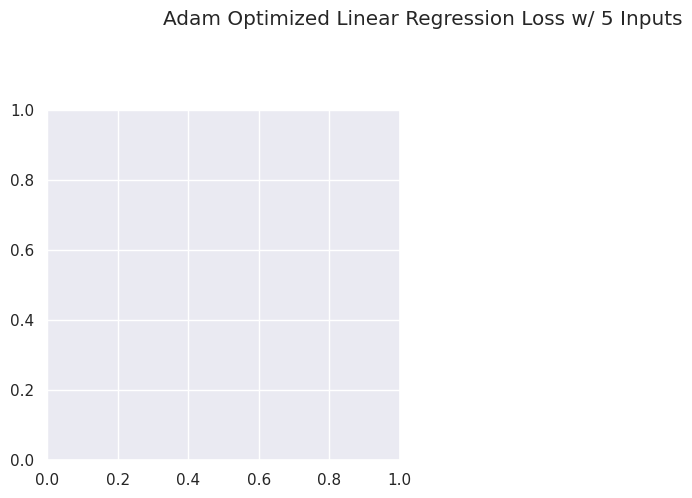

In [ ]:
# SGD Optimized
plt.figure(figsize = (10, 10))
plt.suptitle("SGD Optimized Linear Regression Loss w/ 5 Inputs")

plt.subplot(2,2,1)
plt.plot(SGD_trainLoss1, color='black')
plt.plot(SGD_validLoss1, color='red')
plt.title('Loss w/ Learning Rate of 0.1')

plt.subplot(2,2,2)
plt.plot(SGD_trainLoss2, color='black')
plt.plot(SGD_validLoss2, color='red')
plt.title('Loss w/ Learning Rate of 0.01')

plt.subplot(2,2,3)
plt.plot(SGD_trainLoss3, color='black')
plt.plot(SGD_validLoss3, color='red')
plt.title('Loss w/ Learning Rate of 0.001')

plt.subplot(2,2,4)
plt.plot(SGD_trainLoss3, color='black')
plt.plot(SGD_validLoss3, color='red')
plt.title('Loss w/ Learning Rate of 0.0001')

plt.tight_layout()
plt.show()

In [ ]:
# Adam Optimized
plt.figure(figsize = (10, 10))
plt.suptitle("Adam Optimized Linear Regression Loss w/ 5 Inputs")

plt.subplot(2,2,1)
plt.plot(ADAM_trainLoss1, color='black')
plt.plot(ADAM_validLoss1, color='red')
plt.title('Loss w/ Learning Rate of 0.1')

plt.subplot(2,2,2)
plt.plot(ADAM_trainLoss2, color='black')
plt.plot(ADAM_validLoss2, color='red')
plt.title('Loss w/ Learning Rate of 0.01')

plt.subplot(2,2,3)
plt.plot(ADAM_trainLoss3, color='black')
plt.plot(ADAM_validLoss3, color='red')
plt.title('Loss w/ Learning Rate of 0.001')

plt.subplot(2,2,4)
plt.plot(ADAM_trainLoss3, color='black')
plt.plot(ADAM_validLoss3, color='red')
plt.title('Loss w/ Learning Rate of 0.0001')

plt.tight_layout()
plt.show()